# Modelado de Probabilidades de Clase con Regresión Logística #
El problema principal con el perceptrón es que nunca converge si si las clases no son perfectamente linealmente separables.

Se puede utilizar otro algoritmo simple, pero potente, para problemas de clasificación lineal y binario denominaodo **regresión logística**. Pese a su nombre, la regresión logística es un modelo para clasificación y no para regresión.

### Regresión logística y probabilidades condicionales ###
Como ya se ha dicho, la regresión logística es un **modelo lineal de clasificación** muy fácil de implementar y con un muy buen rendimiento en clases separables linealmente.

> ##### Regresión logística para múltiples clases #####
> Hay que tener en cuenta que la regresión logística se puede generalizar fácilmente a configuraciones multiclase, lo que se conoce como **regresión logística multinomial** o **regresión softmax**.
> Otra forma de utilizar la regresión logística en entornos multiclase es a través de la técnica OvR.

##### Posibilidad (odds) #####
Para explicar la idea detras de la regresión logística como modelo probabilístico para la clasificación binaria, se va a introducir la idea de **posibilidad (odds)**: las probabilidades a favor de un evento en particular. La posibilidad se puede expresar por $\frac{p}{1-p}$ donde $p$ expreasa la probabilidad de un evento de interes.

##### Función logit #####
La **función logit** es simplemente el logaritmo neperiano o natural de la posibilidad (log-odds):

$$logit(p) = ln \frac{p}{1 - p}$$

La funcioón *logit* toma valores de entrada entre `0`y `1` y los transforma a valores en todo el rango de números reales que se puede utilizar para expresar una relación lineal entre los valores de las características y el log-odds:

$$logit(p\, (y = 1|\textbf{x})) = w_0x_0 + w_1x_1 + \ldots + w_mx_m = \sum_{i=0}^mw_ix_i = \textbf{w}^T\textbf{x}$$

Donde $logit(p\, (y = 1|\textbf{x}))$ es la *probabilidad condicional* de que un ejemplo en particular pertenezca a la clase $1$ dado sus características $\textbf{x}$.

##### Función sigmoidal #####
Como en lo que se está realmente interesado es en predecir la probabilidad de que un determinado ejemplo pertenezca a una determinada clase, lo que se necesita es la __*forma inversa de la función logistica*__, que se denomina **función sigmoidal logística** o simplemente **función sigmoidal** debido a su forma en 'S' característica:

$$\phi (z) = \frac{1}{1 + e^{-z}}$$

Donde $z$ es la entrada neta, es decir, la combinación lineal de pesos y las entradas (las características asociadas a los ejemploos de entrad):

$$z = \textbf{w}^T\textbf{x} = w_0x_0 + w_1x_1 + \ldots + w_mx_m$$

Donde $w_0$ representa la unidad de sesgo y $x_0$ la entrada adicional cuyo valor es $1$.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

<IPython.core.display.Javascript object>


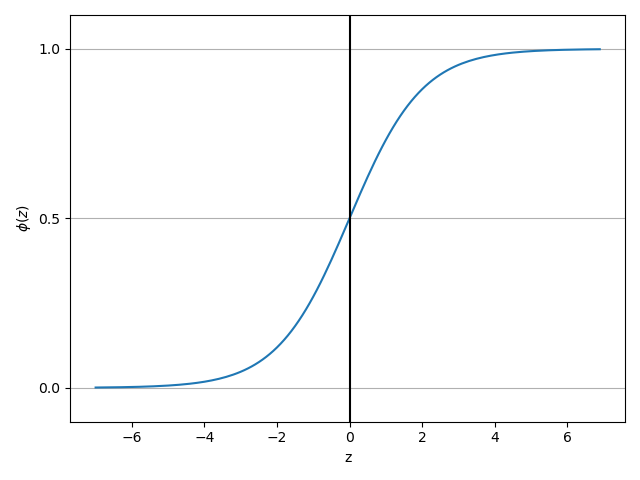

In [4]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

se observa que $\phi (z)$ se aproxima a $1$ cuando $z$ tiende a infinito ($z \rightarrow \infty$) ya que $e^{-z}$ se vuelve muy pequeño para valores grandes de $z$. De forma similar, $\phi (z)$ tiende a $0$ cuando $z \rightarrow -\infty$ ya que el denomimador se va haciendo cada vez más grando para valores pequeños de $z$.

La diferencia entre Adaline y la regresión logística es que en la primera se utiliza una *función lienal*, mientras que en la segunda se utiliza la *función sigmoidal*.

![Adaline vs Regresión Logística](imgs/adalinevlogit.png)

El resultado de la función sigmoidal  se interpreta como la probabilidad de que un determinado ejemplo pertenezca a la clase $1$, $\phi (z) = P(y = 1|\textbf{x};\textbf{w})$, dado sus características, $x$, parametrizas por los pesos, $w$.

La probabilidad predecidad se puede transforma después en un resultado binario simplemente por medio de una función umbral:

$$\hat{y} =  \begin{cases} 1 & \text{si }\phi (z) \geq 0.5 \\ 0 & sino \end{cases}$$

Si se mira la gráfica de la función sigmoidal, esto es eqivalente a:

$$\hat{y} =  \begin{cases} 1 & \text{si z} \geq 0.5 \\ 0 & sino \end{cases}$$


### Aprender los pesos de la función de coste logística ###
Para explicar como derivar la función de coste para la regresión logística primero definimos la **función de verosimilitud**, $L$, que se pretende **maximizar** cuando se construye un modelo de regresión logistica, asumiendo que los ejemplos individuales en el conjunto de datos son independientes unos de otros. La fórmula es la siguiente:

$$L(\textbf{w}) = P(\textbf{y}|\textbf{x};\textbf{w}) = \begin{equation*} \prod_{i=1}^{n} P\big(y^{(i)}|x^{(i)};\textbf{w} \big) = \prod_{i=1}^{n} \Big(\phi \big(z^{(i)} \big) \Big)^{y^{(i)}} \Big(1 - \phi \big(z^{(i)} \big) \Big)^{1 - y^{(i)}} \end{equation*}$$

En la práctica, es más fácil maximizar el logaritmo neperiano de esta función, denominado **función logartimo de verosimilitud**, $l$:

$$l(\textbf{w}) = ln L(\textbf{w}) = \sum_{i=1}^{n} \bigg[y^{(i)}ln \Big(\phi \big(z^{(i)} \big) \Big)  + \big(1 - y^{(i)} \big)ln \Big(1 - \phi \big(z^{(i)} \big) \Big) \bigg]$$

Ahora, se podría utilizar un **algoritmod de optimización** como el **gradiente ascendente** para **maximizar** esta función logaritmo de verosimilitud.

##### Función de Coste #####
La **funcón de coste** que se utiliza en la regresión logística es la reescritura de la función logaritmo de verosimilitud como una función de coste, $J$, que se puede **minimimar** mediante el **gradiente descendente** que ya se ha visto.

$$J(\textbf{w}) = \sum_{i=1}^{n} \bigg[-y^{(i)}ln \Big(\phi \big(z^{(i)} \big) \Big) - \big(1 - y^{(i)} \big)ln \Big(1 - \phi \big(z^{(i)} \big) \Big) \bigg]$$

Para tener una mejor percepción de esta función de coste, se va a hecar un vistazo al coste que se calcula para un único ejemplo de entrenamiento:

$$J\big(\phi (z),y;\textbf{w} \big) = -yln\big(\phi (z)\big) - (1 - y)ln\big(1 - \phi (z)\big)$$

Se pude observar que el primer término se convierte en $0$ si $y=0$, y el segundo es $0$ si $y=1$

$$J(\phi (z),y;\textbf{w}) =  \begin{cases} -ln\big(\phi (z)\big) & \text{si }y=1 \\ -ln\big(1-\phi (z)\big) & \text{si }y=0 \end{cases}$$

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [6]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

<IPython.core.display.Javascript object>


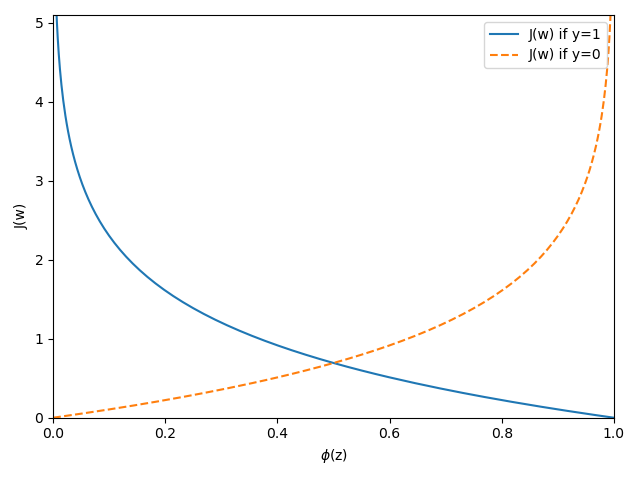

In [7]:
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

El gráfico resultante muestra la activación sigmoidea en el eje $x$ en el rango de $0$ a $1$ (las entradas a la función sigmoidea fueron valores $z$ en el rango $–10$ a $10$) y el costo logístico asociado en el eje $y$.

Se puede ver que el costo se aproxima a $0$ (línea continua) si predecimos correctamente que un ejemplo pertenece a la clase $1$. De manera similar, podemos ver en el eje $y$ que el costo también se acerca a $0$ si predecimos correctamente $y = 0$ (línea discontinua). Sin embargo, si la predicción es incorrecta, el costo va hacia el infinito. El hecho a destacar es que penalizamos las predicciones erróneas con un costo cada vez mayor.

### Implementación del algoritmo para la Regresión Logística ###

In [8]:
class LogisticRegressionGD(object):
    """Clasificador de Regresión Logística que utiliza el 
        gradiente descendente.
    
    Parametros
    ----------
    eta : float
        Tasa de aprendizaje (entre 0.0 y 1.0)
    n_iter : int
        Número de épocas.
    random_state : int
        Generador de números aleatorias para la inicialización
        de los pesos.
    
    Atributos
    ---------
    w_ : 1d-array
        Pesos calculados.
    cost_ : list
        Valor de la función de coste logística para cada época.
    
    """
    def __init__(self, eta=0.5, n_iter=100, random_state=100):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """ Encaje de los datos de entrenamiento.
        
        Parametros
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Vectores de entrenamientos, donde n_examples es el
            número de ejemplos y n_features es el número de 
            característica.
        y : array-like, shape = [n_examples]
            Valores objetivo.
        
        Retorno
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # Ahora se calcula el 'coste' logístico
            # en lugar del coste de las suma del cuadrado
            # de los erroes
            cost = (-y.dot(np.log(output)) - 
                       ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, X):
        """Cálculo de la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """Cálcula la activación sigmoidal logística"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """Devuelve la etiquta de clase aplicando la función
           escalón unitario
            """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Hay que tener en cuenta que esta implementación solo funciona para clasificaciones binarias.

In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # configuración del generador de marcas y el mapa de color
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # dibuja la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='conjunto test')

<IPython.core.display.Javascript object>


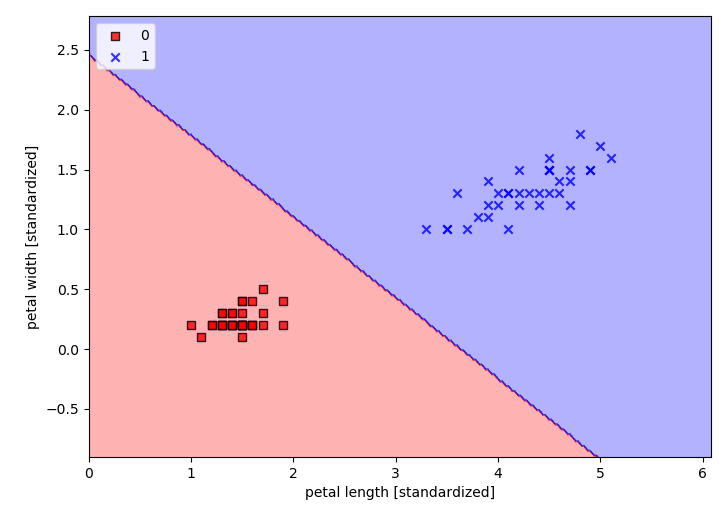

In [10]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05,
                            n_iter=1000,
                            random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

> ### Gradiente descendente para la regresión logística ###
> Primero se calcula las derivadas parciales de la función log de verosimilitud con respecto al peso *j*-esimo:
> 
> $$\frac{\partial }{\partial w_j}l(w) = \left(y\frac{1}{\phi (z)} - (1 - y)\frac{1}{1 - \phi (z)} \right)\frac{\partial }{\partial w_j}\phi (z)$$
>
> También hay que calcular la derivada de la función sigmoide
> $$\frac{\partial }{\partial z}\phi (z) = \frac{\partial }{\partial z}\frac{1}{1 + e^{-z}} = \frac{1}{(1 + e^{-z})^2}e^{-z} = \frac{1}{1 + e^{-z}} \left(1-\frac{1}{1 + e^{-z}} \right) = \phi (z) \big(1 - \phi(z)\big)$$
>
> Sustituyendo este resultado en la primera ecuación se tiene
>
> $$\begin{align}\left(y\frac{1}{\phi (z)} - (1 - y)\frac{1}{1 - \phi (z)} \right)\frac{\partial }{\partial w_j}\phi (z) &= (y\frac{1}{\phi (z)} - (1 - y)\frac{1}{1 - \phi (z)})\phi (z)(1 - \phi(z))\frac{\partial}{\partial w_j}z \\
&=\Big(\big(1 - \phi (x)\big) - (1 - y) \phi (z) \Big)x_j \\
&=\big(y - \phi (z)\big)x_j\end{align}$$
>
> Hay que recordar que el objetivo es encotrar los pesos que maximize el log de verosimilitud para que se puede realizar la actualización por cada peso como sigue:
>
> $$\begin{equation*}w_j := w_j + \eta \sum_{i=1}^n \Big(y^{(i)} - \phi \big(z^{(i)}\big)\Big)x_j^{(i)} \end{equation*}$$
>
>
> Se define $\Delta \mathbf{w}$ como sigue:
>
> $$\Delta \mathbf{w} = \eta \nabla l(\mathbf{w})$$
>
> Como maximizar el log de verosimilitud es igua a minimizar la función de costa, $J$, se puede expresar la regla de actualización de gradiente descendente como:
>
> $$\begin{equation*} \Delta w_j = -\, \eta\, \frac{\partial J}{\partial w_j} = \eta \sum_{i=n}^n \Big(y^{(i)} - \phi \big(z^{(i)}\big)\Big)x_j^{(i)} \end{equation*}$$
>
> $$\mathbf{w} := \mathbf{w} + \Delta \mathbf{w}, \,\, \Delta \mathbf{w} = -\eta \nabla J(\mathbf{w})$$

### Entrenar un modelo de regresión logística con scikit-learn ###
La libreria scikit-learn tiene una implementación más optimizada de la regresión logística que, además, permite clasificación multi clase. En las versiones recientes de scikit-learn se proporciona de forma automática la técnica de clasificación multi clase, multinomial, OvR.

Primero se estandariza las característica de los ejemplos.

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<IPython.core.display.Javascript object>


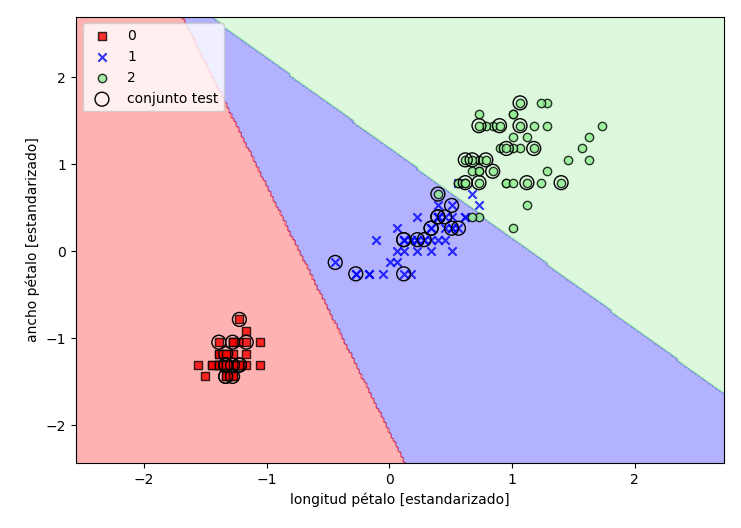

In [12]:
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('longitud pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

> Hay que hacer notar que existen muchos algoritmos de optimización diferentes para resolver los problemasd de optimización. Para minimizar funciones de coste convexas, como es el coste de la regresión logística, se recomienda la utilización de técnicas mas avanzadas que el gradiente descendente estocástico (SGD). De hecho, scikit-learn implementa una amplia gama de algoritmos de optimización que se pueden especificar por medio del parámetro `solver`, concretamente, `'newton-cg'`, `'lbfgs'`, `'libliniar'`, `sag` y `'saga'`.
> 
> Si el coste de regresión lineal es convexo, la mayoría de los algoritmos de optimización convergeran con facilidad al mínimo global. No obstante, hay ciertas ventajas en utilizar unos algoritmos sobre los otros.

La probabilidad de que los ejemplos de entrenamiento pertenezcan a cierta clase se puede calcular utilizando el método `predict_proba`.

In [13]:
lr.predict_proba(X_test_std[:3,:])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

Ahora, se puede obtener la etiqueta de clase predecida identificando la columna mayor en cada fila:

In [14]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0])

Una forma más fácil de obtener las etiquetas de clase predecidas es invocando directamente al método `predict`de `LogisticRegression`

In [15]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

Hay que tener en cuenta que scikit-learn espera un array de dos dimensiones como datos de entrada, así que si queremos obtener la etiqueta de clase predecida para un único ejemplo, se tiene que convertir una única fila a este formato. Una forma de convertir un array de una dimensión en un array de dos dimensiones es utilizando el método `reshape`de NumPy para añadir una nueva dimensión:

In [16]:
lr.predict(X_test_std[0,:].reshape(1, -1))

array([2])

> Si una dimensión de `reshape` tiene le valor $-1$, la dimensión correspondiente se inferira de la longitud del array y del valor de las otras dimensiones. En este caso, como el el array es de 1 dimensión y la primera dimensión es $1$, la segunda dimensión será igual al número de elementos ($m$) en el array de una dimensión, quedando un array de dos dimensiónes de tamaño $1 \times m$.

### Abordar el sobreajuste por medio de la regularización ###
El **sobreajuste** es un problema común en el aprendizaje automático, donde un modelo tiene buen rendimieto con los datos de entrenamiento pero no generaliza bien con los datos no vistos (datos de test). Si un modelo sufre de sobreajuste, también decimos que el modelo tiene una alta varianza, que puede estar causada por tener demasiados parámetros, lo que lleva a un modelo que es demasiado complejo dados los datos subyacentes. Del mismo modo, el modelo también puede sufrir un **subajuste** (alto sesgo), que significa que el modelo no es lo suficientemente complejo como para capturar bien el patrón en los datos de entrenamiento y, por lo tanto, también sufre de bajo rendimiento en datos no vistos.

![Sobreajuste](imgs/overfitting.png)

> ##### Compromiso sesgo-varianza #####
> En el contexto de los modelos de aprendizaje automático, la **varianza** mide la consistencia (o variabilidad) de la predición del modelo para clasificar un ejemplo en particular cuando se reentrena el modelo varias veces en diferentes subconjuntos de los datos de entrenamiento. Se puede decir que el modelo es sensible a la aleatoriedad de los datos de entrenamiento. En contraste, el **sesgo** mide qué lo alejadas que están las predicciones de los valores correctos en general si reconstruimos el modelo varias veces en diferentes conjuntos de datos de entrenamiento; El sesgo es la medida del error sistemático que no se debe a la aleatoriedad.

##### Regularización #####
Una forma de encontrar un buen equilibrio entre sesgo y varianza es ajustar la complejidad del modelo mediante la **regularización**. La regularización es un método muy útil para gestionar la colinealidad (alta correlación entre las características), filtrar el ruido de los datos y, finalmente, evitar el sobreajuste.

El concepto detrás de la regularización es introducir información adicional (sesgo) para penalizar los valores extremos de parámetros (peso). La forma más común de regularización es la denominada **regularización L2** (a veces también llamada contracción L2 o disminución de peso), que se puede escribir de la siguiente manera:

$$\frac{\lambda}{2}\begin{Vmatrix}\mathbf{w}\end{Vmatrix}^2 = \frac{\lambda}{2} \sum_{j=1}^m w_j^2$$

Donde $\lambda$ es el denominado **parámetro de regularización**

> ##### Regularización y normalización de características #####
> La regularización es otra de las razón por la cual el escalado de características como la estandarización es importante. Para que la regularización funcione correctamente, debemos asegurarnos de que todas las características estén en escalas comparables.

A través del parámetro de regularización, $\lambda$, se puede controlar cómo se ajustan los datos de entrenamiento, manteniendo, al mismo tiempo, los pesos pequeños. Al aumentar el valor de $\lambda$, aumentamos la fuerza de regularización.

El parámetro `C` de `LogisticRegression` está directamente relacionado con el parámetro de regularización, que es su inverso. En consecuencia, disminuir el valor del parámetro de regularización inversa, `C`, significa que se aumenta la intensidad de la regularización, que se puede visualizar trazando la gráfica de regularización L2 para los dos coeficientes de peso:

<IPython.core.display.Javascript object>


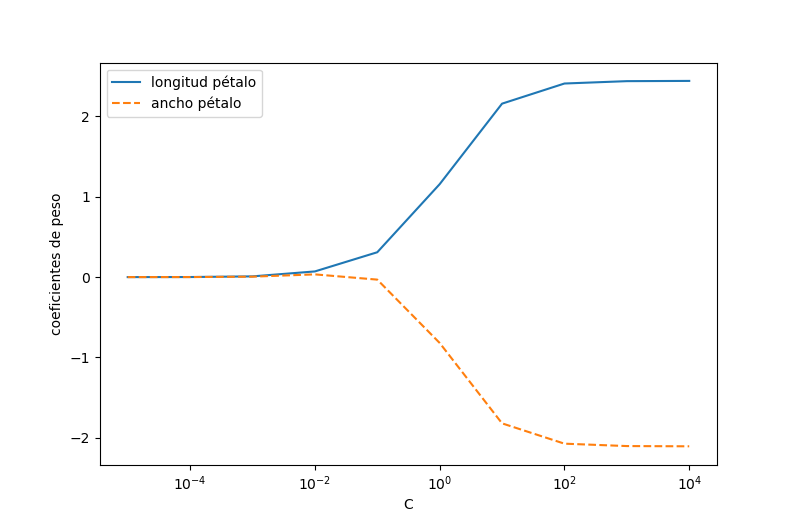

In [21]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1,
                            solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:,0],
         label = 'longitud pétalo')
plt.plot(params, weights[:,1], linestyle='--',
         label = 'ancho pétalo')
plt.ylabel('coeficientes de peso')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

En el código anterior, se ajustan 10 modelos de regresión logística con diferentes valores para el parámetro de regularización inversa, `C`. Con fines de ilustración, solo recolectamos los coeficientes de peso de la clase 1.

Como se aprecia en la gráfica resultante, los coeficientes de peso se reducen al disminuir el parámetro `C`, es decir, si aumentamos la intensidad de regularización